In [1]:
import pandas as pd
from base.JuUnits import parallal_task,task_chunk_split

%load_ext autoreload
%autoreload 1
%aimport base.JuUnits

jqdatasdk not installed
you are using non-interactive mdoel quantaxis


In [2]:
def calc_square1(x,x2,x3):
    import pandas as pd
    for i in range(10000):
        print(i**2)  
    return pd.DataFrame({"A"+str(x):[x*x+x3+x2,(x*x+x3+x2)*2]})

def loadQA(x):
    import time
    starttime = time.time()
#     from QUANTAXIS.QAFetch.QAQuery_Advance import QA_fetch_stock_day_adv
    import QUANTAXIS as QA
    end1 = time.time() - starttime
    
    starttime = time.time()
    data = QA.QA_fetch_stock_day_adv(x, '2005-05-29', '2020-06-29')
    end2 = time.time() - starttime
#     return (x,end1,end2)
    return data.data

# arg = [i for i in range(0,10)]
# t = parallal_task(4, calc_square1,arg, x2=0.5, x3=0.01)
%time t = parallal_task(4, loadQA,task_chunk_split(['000001','000002','000004','000005','000006','000008','000010','000012','000014'],4))
# print(t)
# tt = pd.concat(t)
# tt

Now in the main code. Process name is: base.JuUnits
base.JuUnits, subpid:5977  pid:2310


: 

: 

In [4]:
tt = pd.concat(t)
tt.index.get_level_values(1).unique()

Index(['000001', '000002', '000004', '000005', '000006', '000008', '000010',
       '000012', '000014'],
      dtype='object', name='code')

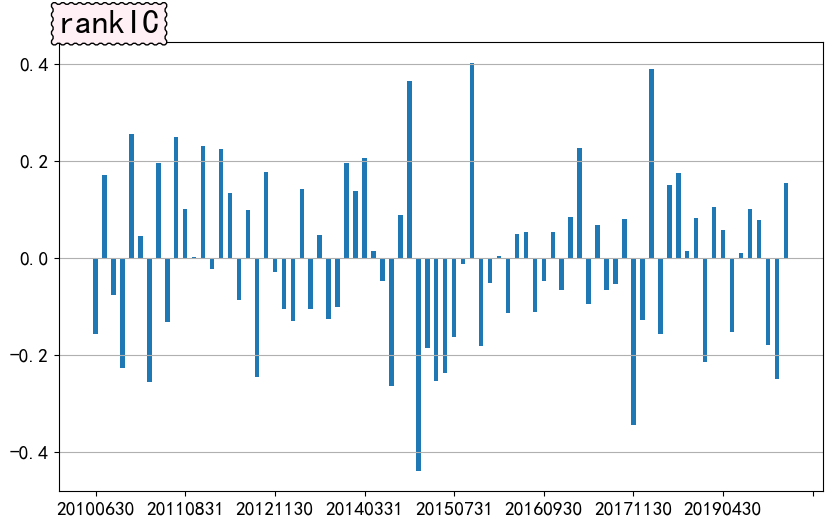

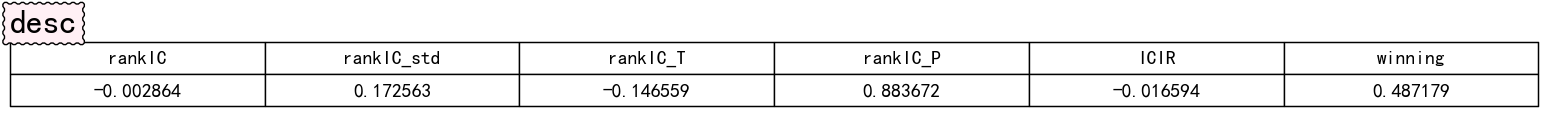

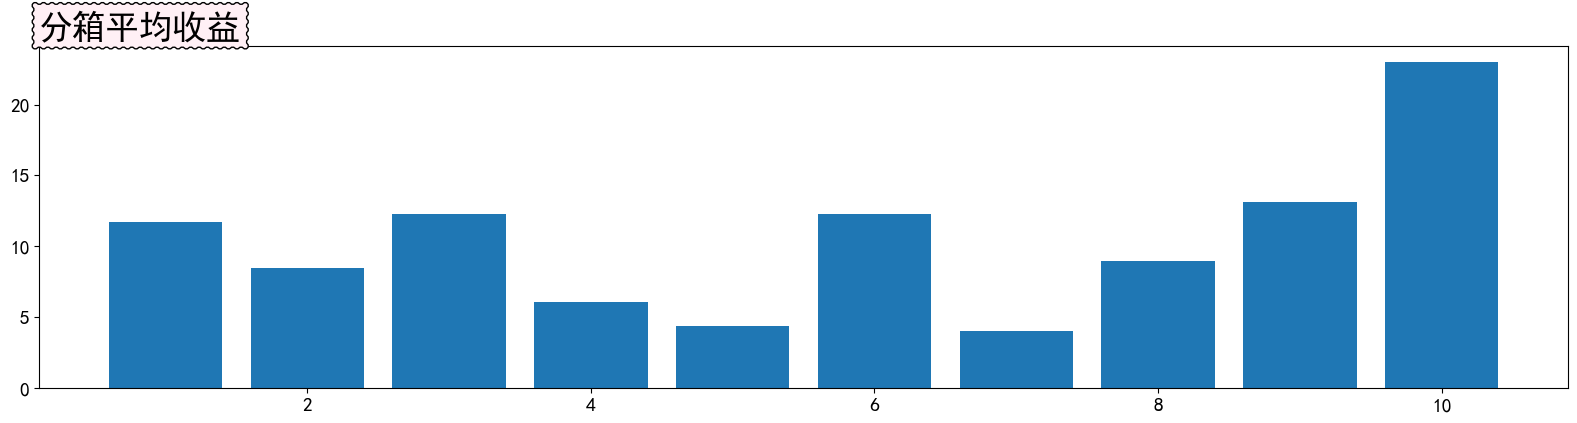

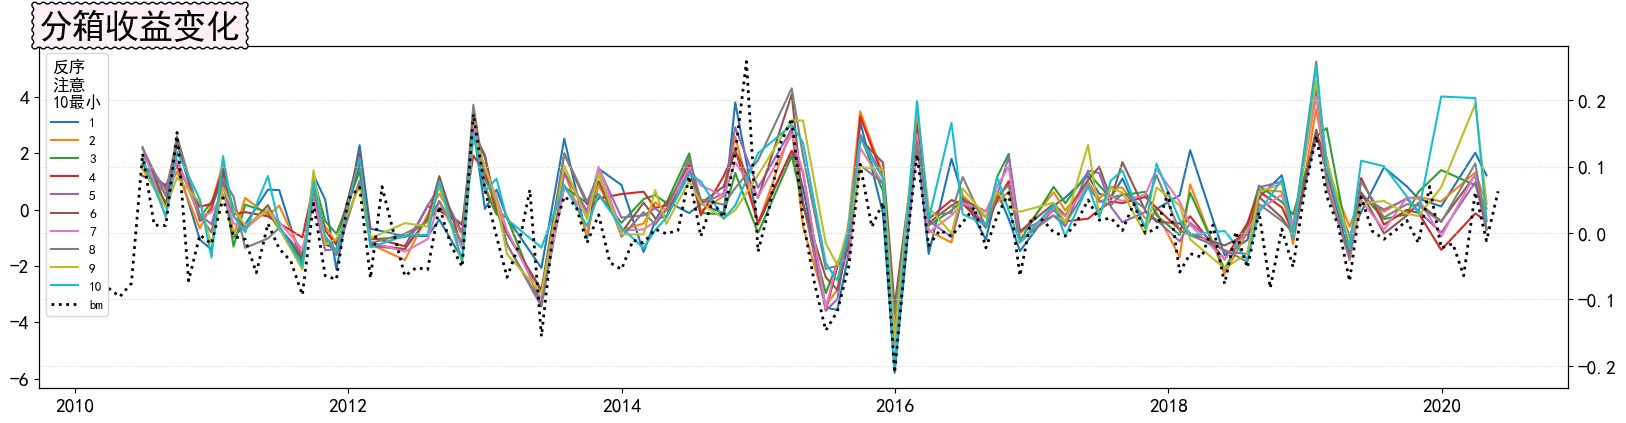

/home/work_space/IndicatorLab/tools/Test_Tools.py:261: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ind_binned_ret_cum = ind_binned_ret_date.groupby(level=1).apply(lambda x: x.cumsum())


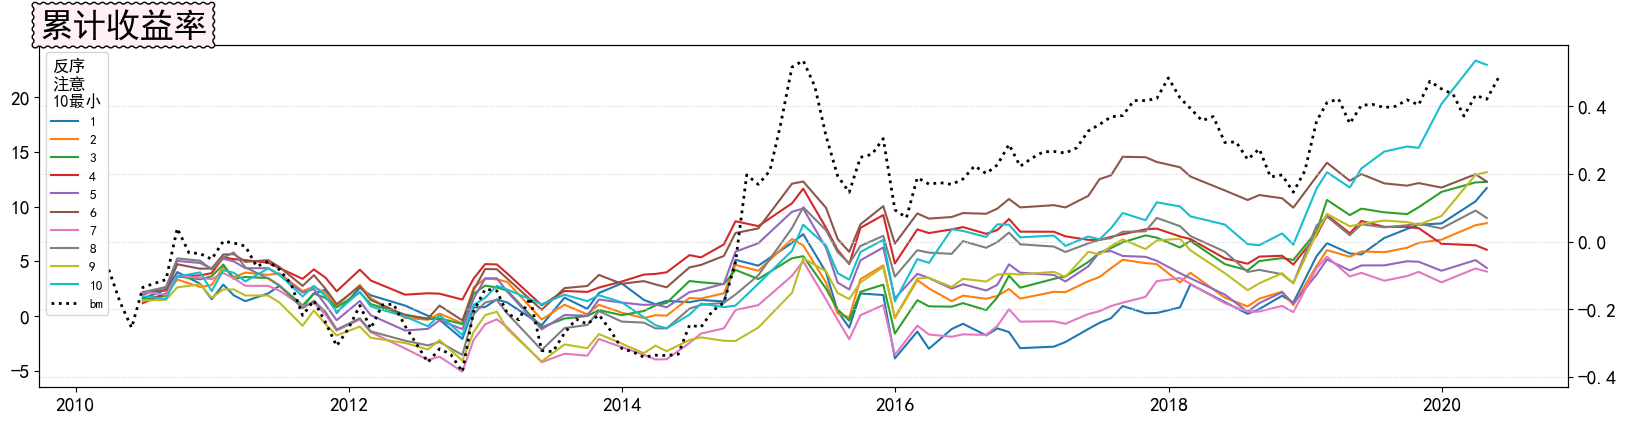

CPU times: user 35.9 s, sys: 7.2 s, total: 43.1 s
Wall time: 1min 26s


In [5]:
%%time

from ind.ind_base import Ind_MACD_JCSC
from tools import Test_Tools

# %load_ext autoreload
# %autoreload 1
# %aimport Test_Tools


test = Test_Tools.FactorTest(Ind_MACD_JCSC.MACD_JCSC, sample='沪深300',freq="m",end='2020-06-29',gap=2500,only_main=True,neutralize={'enable':True,'static_mv':True})

test.process()
test.plot()


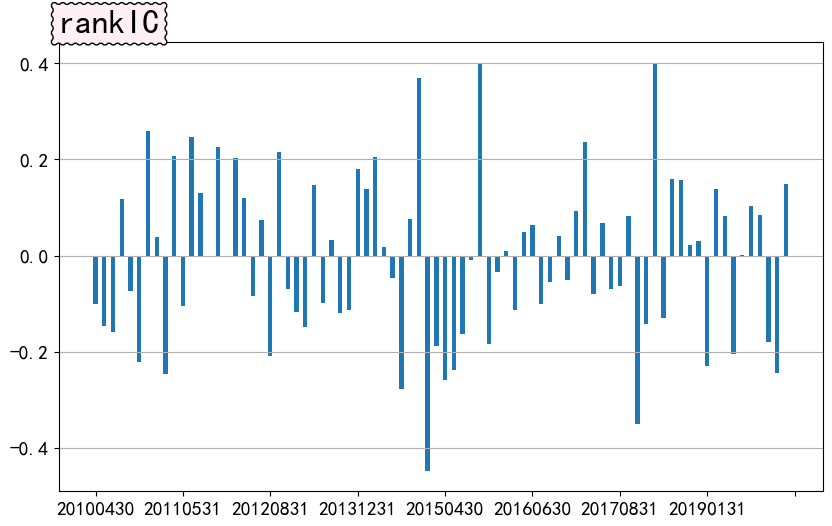

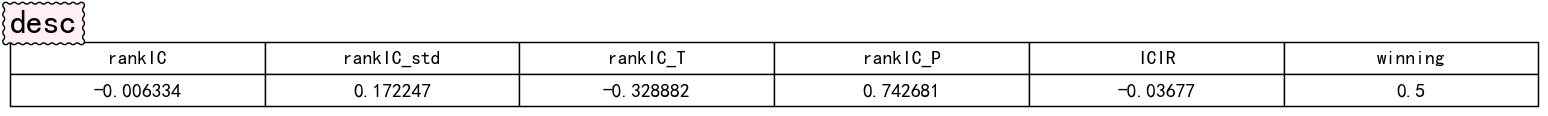

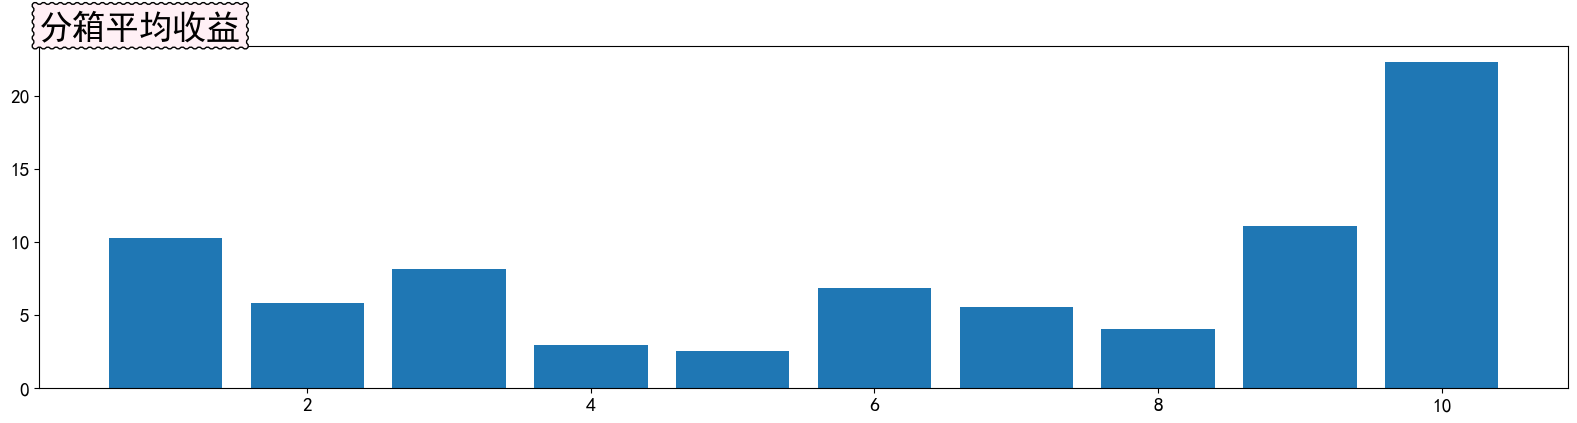

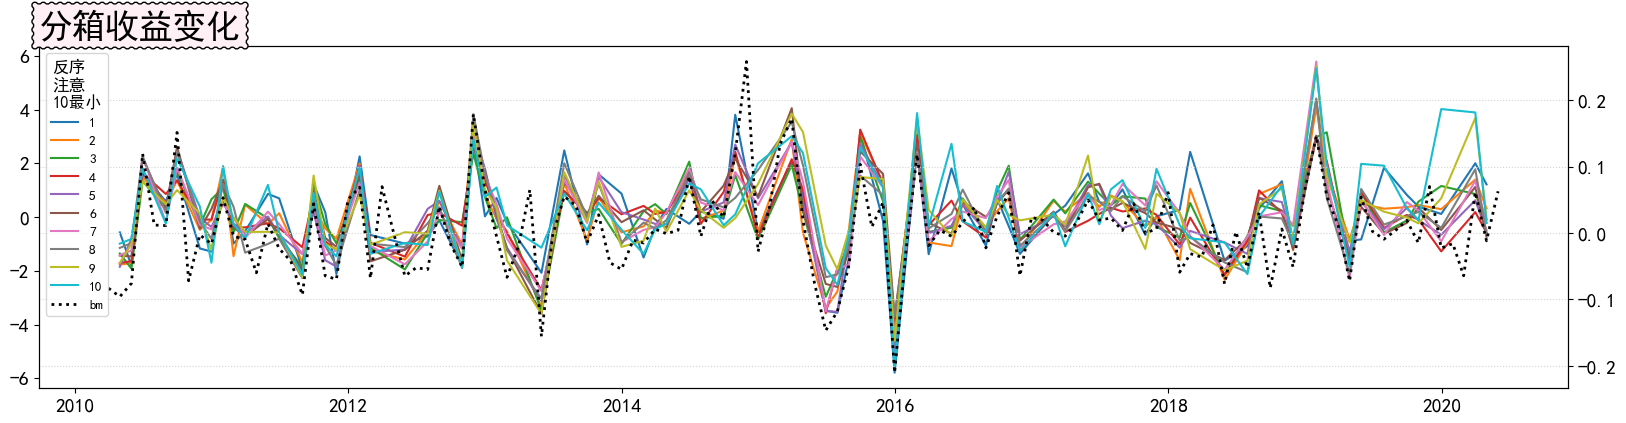

/home/work_space/IndicatorLab/tools/Test_Tools.py:261: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ind_binned_ret_cum = ind_binned_ret_date.groupby(level=1).apply(lambda x: x.cumsum())


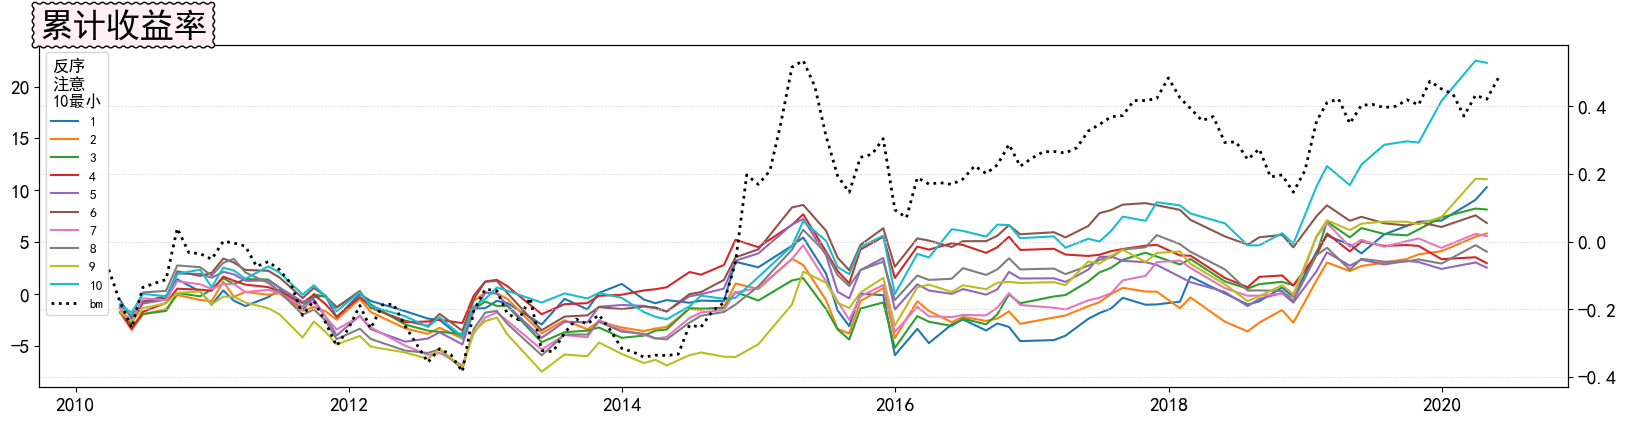

CPU times: user 6.44 s, sys: 1.19 s, total: 7.63 s
Wall time: 45.7 s


In [16]:
%%time

# import Ind_MACD_JCSC
from ind.ind_base import Ind_MACD_JCSC
from tools.Test_Tools import FactorTest

# %load_ext autoreload
# %autoreload 1
# %aimport tools.Test_Tools

test2 = FactorTest(Ind_MACD_JCSC.MACD_JCSC, sample='沪深300',freq="m",end='2020-06-29',gap=2500,only_main=True,neutralize={'enable':False,'static_mv':True})

# test2.process_multi()
test2.process()
test2.plot()



In [9]:
# from pytdx.hq import TdxHq_API

# ip="115.238.90.165"
# port=7709

# api = TdxHq_API()
# with api.connect(ip, port):
# #     dd = api.to_df(api.get_security_list(j, i * 1000)) for i in range(int(api.get_security_count(j) / 1000) + 1)
#     data = pd.concat(
#         [pd.concat(
#             [api.to_df(api.get_security_list(j, i * 1000)).assign(sse='sz' if j == 0 else 'sh') for i in range(int(api.get_security_count(j) / 1000) + 1)]
#             , axis=0, sort=False) for j in range(2)
#         ], axis=0, sort=False)

# print(data)

# # with api.connect(ip, port):
# #     page_count = int(api.get_security_count(0) / 1000) + 1

# with api.connect(ip, port):
#     data9=api.to_df(api.get_security_list(0, 9000))

# print(data[data['code'].str.startswith("30").fillna(False)]['code'].to_list())

       code  volunit  decimal_point     name     pre_close sse
0    395001      100              2     主板Ａ股  1.469000e+03  sz
1    395002      100              2     主板Ｂ股  2.080000e+02  sz
2    395004      100              2      创业板  1.014000e+03  sz
3    395005      100              2     主板DR  5.877472e-39  sz
4    395006      100              2    创业板DR  5.877472e-39  sz
..      ...      ...            ...      ...           ...  ..
681  560500      100              3  500ETF加  5.877472e-39  sh
682  560560      100              3    碳中和TK  5.877472e-39  sh
683  561350      100              3    国泰500  5.877472e-39  sh
684  561600      100              3     消费电子  5.877472e-39  sh
685  562800      100              3     稀有金属  5.877472e-39  sh

[30866 rows x 6 columns]


In [8]:
# import numpy as np
# a = np.array([(['a1','a1','a1'],['b1','b1'],['c1','c1']),(['a2','a2'],['b2','b2'],['c2','c2']),(['a3'],['b3','3','b3'],['c3','c3']),(['c'],['d'],[])], dtype=object)
# a.T.tolist()[1]
